# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 4, часть 2. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. 
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `...`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 2 &mdash; 40 баллов.

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 2 &mdash; 80 баллов;
* Задача 4 &mdash; 50 баллов.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad4_part2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
from typing import Tuple
import numpy as np
from sklearn import datasets

from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from IPython.display import clear_output

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset

sns.set(palette="Set2")
cm_bright = ListedColormap(["#FF2200", "#00CC66"])

В условии задания обозначены области, в которых запрещено использование ИИ-инструментов. Это не исчерпывающий список. Подробные правила можно найти <a href="https://thetahat.ru/courses/ai-rules">по ссылке на сайте</a>. В частности, запрещено применять ИИ-инструменты при решении теоретических частей задач, ответах на вопросы и написании выводов.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 2.

**При решении задачи запрещено пользоваться ИИ-инструментами,** но можно при оформлении решения.

Рассмотрим двухслойную полносвязную нейронную сеть, которая принимает на вход $x\in\mathbb{R}^d$ и возвращает $y\in\{0, 1\}$
$$y_\theta(x) = \sigma_2 \big( \sigma_1 \left( x^{\top} W_1 + b_1 \right) W_2 + b_2 \big),$$
где 
* $W_1 \in \mathbb{R}^{d \times h}, b_1 \in \mathbb{R}^{h}$ &mdash; параметры 1-го слоя,
* $W_2 \in \mathbb{R}^{h \times 1}, b_2 \in \mathbb{R}$ &mdash; параметры 2-го слоя,
* $\theta = (W_1, b_1, W_2, b_2)$ — все параметры нейросети,
* $\sigma_1(x) = \tanh x = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$ &mdash; гиперболический тангенс, функция активации 1-го слоя, применяется поэлементно,
* $\sigma_2(x) = \frac{1}{1 + e^{-x}}$ &mdash; логистическая сигмоида, функция активации 2-го слоя.

**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

*Для вставки изображения скопируйте его и вставьте в ячейку markdown с помощью `Ctrl+V`. Должно появится либо большое количество символов (Colab), либо что-то вроде `![image.png](attachment:image.png)`.*

## Описание нейронной сети

$$
\begin{aligned}
& x \in \mathbb{R}^{1 \times d} \\
& \downarrow \\
& [x W_1 + b_1] \quad \text{где} \quad W_1 \in \mathbb{R}^{d \times h}, \, b_1 \in \mathbb{R}^{1 \times h} \\
& \downarrow \quad \tanh \\
& \text{hidden} \in \mathbb{R}^{1 \times h} \\
& \downarrow \\
& [\text{hidden} W_2 + b_2] \quad \text{где} \quad W_2 \in \mathbb{R}^{h \times 1}, \, b_2 \in \mathbb{R} \\
& \downarrow \quad \text{sigmoid} \\
& y \in [0,1]
\end{aligned}
$$

Общее количество параметров $ = d · h + 2h + 1 $

**2.** Дана обучающая выборка $X \in \mathbb{R}^{n \times d}$ — матрица входных данных и $Y \in \{0, 1\}^{n}$ — таргет. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $\mathscr{L}$, в данном случае рассмотрим кросс энтропию
$$\mathscr{L}(\theta) = -\sum_{i=1}^n \big( Y_i \log y_\theta(X_i) + (1-Y_i) \log \left(1-y_\theta(X_i)\right) \big).$$

Наша цель — определить оптимальные параметры нашей модели, минимизируя функцию $\mathscr{L}(\theta)$ на заданном наборе данных. Мы будем решать эту задачу с помощью метода градиентного спуска, который требует вычисления производных по всем параметрам сети. Конечно, в данном случае несложно выписать все производные напрямую, с чем каждый из вас легко сможет справиться.

Однако прямое вычисление производных имеет квадратичную зависимость от количества параметров, что делает его неэффективным. Из-за этого мы не смогли бы быстро обучать глубокие нейронные сети. Хотя в данном случае речь идёт всего лишь о двух слоях, понимание работы методов на простых примерах было бы полезно.

На лекции был рассказан метод **обратного распространения ошибки (back propagation)** и показан его пример для двухслойной нейронной сети (на доске). Выпишите все необходимые производные для применения метода back propagation.

# 2. Вычисление производных методом Backpropagation

## 2.1. Градиент по выходу второго слоя

Первый важный факт, который часто используется для упрощения:  
$$
\frac{\partial \mathscr{L}}{\partial z_2^{(i)}} 
= y_\theta(X_i) - Y_i.
$$
  
**Так как**  
- Производная кросс-энтропии $-\left[Y_i \log a + (1 - Y_i)\log(1-a)\right]$ по $a$ равна $\frac{a - Y_i}{a(1-a)}$.  
- Производная сигмоиды $a = \frac{1}{1+e^{-z}}$ по $z$ равна $a(1-a)$.  
- Перемножая, получаем $a - Y_i$.  

Таким образом, для каждого объекта $i$:
$$
\frac{\partial \mathscr{L}}{\partial z_2^{(i)}} 
= y_\theta(X_i) - Y_i.
$$

---

## 2.2. Производные по параметрам второго (выходного) слоя

### 2.2.1. Производная по $W_2$

$$
z_2^{(i)} = a_1^{(i)} W_2 + b_2.
$$

Замечаем, что $\frac{\partial z_2^{(i)}}{\partial W_2} = a_1^{(i)}$ 
Тогда:

$$
\frac{\partial \mathscr{L}}{\partial W_2}
= \sum_{i=1}^n \frac{\partial \mathscr{L}}{\partial z_2^{(i)}} \cdot \frac{\partial z_2^{(i)}}{\partial W_2}
= \sum_{i=1}^n \bigl(y_\theta(X_i) - Y_i\bigr) \, a_1^{(i)}.
$$

### 2.2.2. Производная по $b_2$

$$
\frac{\partial z_2^{(i)}}{\partial b_2} = 1.
$$
Значит,

$$
\frac{\partial \mathscr{L}}{\partial b_2}
= \sum_{i=1}^n \frac{\partial \mathscr{L}}{\partial z_2^{(i)}} \cdot \frac{\partial z_2^{(i)}}{\partial b_2}
= \sum_{i=1}^n \bigl(y_\theta(X_i) - Y_i\bigr).
$$

---

## 2.3. Градиент по входу второго слоя $a_1^{(i)}$

По цепочке:

$$
\frac{\partial \mathscr{L}}{\partial a_1^{(i)}} 
= \frac{\partial \mathscr{L}}{\partial z_2^{(i)}} 
  \cdot \frac{\partial z_2^{(i)}}{\partial a_1^{(i)}}.
$$
Из $z_2^{(i)} = a_1^{(i)} W_2 + b_2$ следует, что  
$\frac{\partial z_2^{(i)}}{\partial a_1^{(i)}} = W_2$.  

Значит,

$$
\frac{\partial \mathscr{L}}{\partial a_1^{(i)}} 
= \bigl(y_\theta(X_i) - Y_i\bigr)\,W_2.
$$

(Здесь $W_2$ будет вектором $\mathbb{R}^h$, умножаемым на скаляр $(y_\theta(X_i) - Y_i)$.)

---

## 2.4. Производные по параметрам первого (скрытого) слоя

Теперь нужно «отмотать» ещё на один шаг назад и найти $\frac{\partial \mathscr{L}}{\partial W_1}$ и $\frac{\partial \mathscr{L}}{\partial b_1}$.

### 2.4.1. Зависимость $\mathscr{L}$ от $z_1^{(i)}$

Заметим, что $ a_1^{(i)} = \tanh\bigl(z_1^{(i)}\bigr) $.  
Производная $\tanh(x)$ по $x$ равна $\operatorname{sech}^2(x) = 1 - \tanh^2(x)$.  
Следовательно,

$$
\frac{\partial a_1^{(i)}}{\partial z_1^{(i)}} 
= 1 - \bigl(a_1^{(i)}\bigr)^2.
$$

Тогда по правилу цепочки:

$$
\frac{\partial \mathscr{L}}{\partial z_1^{(i)}} 
= \frac{\partial \mathscr{L}}{\partial a_1^{(i)}} 
  \cdot \frac{\partial a_1^{(i)}}{\partial z_1^{(i)}}
= \Bigl$bigl(y_\theta(X_i) - Y_i\bigr)\,W_2\Bigr)
  \;\odot\; 
  \Bigl(1 - \bigl(a_1^{(i)}\bigr)^2\Bigr).
$$

Здесь $\odot$ означает поэлементное умножение (если считать $a_1^{(i)}$ вектором размерности $h$).

### 2.4.2. Производная по $W_1$

$$
z_1^{(i)} = X_i^{\top} W_1 + b_1.
$$
Значит, $\frac{\partial z_1^{(i)}}{\partial W_1} = X_i$ (при аккуратном учёте форм, это умножение в нужном направлении).  

Тогда

$$
\frac{\partial \mathscr{L}}{\partial W_1}
= \sum_{i=1}^n 
   \frac{\partial \mathscr{L}}{\partial z_1^{(i)}} 
   \cdot 
   \frac{\partial z_1^{(i)}}{\partial W_1}.
$$

Подставляя полученные выражения, получаем:

$$
\frac{\partial \mathscr{L}}{\partial W_1}
= \sum_{i=1}^n 
   \Bigl[\bigl(y_\theta(X_i) - Y_i\bigr)\,W_2 
         \;\odot\; 
         \bigl(1 - (a_1^{(i)})^2\bigr)
   \Bigr] 
   \times X_i,
$$
где знак «$\times$» указывает на то, что нам нужно аккуратно «разложить» в матрицу весов размером $(d \times h)$. В векторно-матричной форме это часто записывают через транспонирование:  
$$
\frac{\partial \mathscr{L}}{\partial W_1} 
= X^\top \cdot \bigl[\text{(выражение по i)}\bigr],
$$
но детальная форма зависит от того, как вы храните данные (строки/столбцы) и в каком порядке идёт умножение.

### 2.4.3. Производная по $b_1$

Аналогично,  
$$
\frac{\partial z_1^{(i)}}{\partial b_1} = 1 
\quad $text{вектор размерности }h).
$$

Тогда

$$
\frac{\partial \mathscr{L}}{\partial b_1}
= \sum_{i=1}^n 
   \frac{\partial \mathscr{L}}{\partial z_1^{(i)}} 
= \sum_{i=1}^n 
   \Bigl[\bigl(y_\theta(X_i) - Y_i\bigr)\,W_2 
         \;\odot\; 
         \bigl(1 - (a_1^{(i)})^2\bigr)
   \Bigr].
$$

---

# 4. Итоговые формулы

Для каждого объекта $i$:

1. **Градиент по выходу второго слоя**:
   $$
   \frac{\partial \mathscr{L}}{\partial z_2^{(i)}} 
   = y_\theta(X_i) - Y_i.
   $$

2. **По параметрам второго слоя**:
   $$
   \frac{\partial \mathscr{L}}{\partial W_2}
   = \sum_{i=1}^n (y_\theta(X_i) - Y_i)\,a_1^{(i)},
   \qquad
   \frac{\partial \mathscr{L}}{\partial b_2}
   = \sum_{i=1}^n (y_\theta(X_i) - Y_i).
   $$

2. **Градиент по входу второго слоя**:
   $$
   \frac{\partial \mathscr{L}}{\partial a_1^{(i)}}
   = (y_\theta(X_i) - Y_i)\,W_2.
   $$

4. **По входу первого слоя** ($z_1^{(i)}$):
   $$
   \frac{\partial \mathscr{L}}{\partial z_1^{(i)}} 
   = (y_\theta(X_i) - Y_i)\,W_2
     \;\odot\;
     \bigl(1 - (a_1^{(i)})^2\bigr).
   $$

5. **По параметрам первого слоя**:
   $$
   \frac{\partial \mathscr{L}}{\partial W_1}
   = \sum_{i=1}^n 
     \bigl[\,(y_\theta(X_i) - Y_i)\,W_2
       \;\odot\;
       \bigl(1 - (a_1^{(i)})^2\bigr)\bigr] 
     \times X_i,
   $$
   $$
   \frac{\partial \mathscr{L}}{\partial b_1}
   = \sum_{i=1}^n 
     \bigl[\,(y_\theta(X_i) - Y_i)\,W_2
       \;\odot\;
       \bigl(1 - (a_1^{(i)})^2\bigr)\bigr].
   $$

(Здесь «$\times X_i$»/«$\odot$» следует понимать аккуратно с учётом размерностей.)


**2.** Выпишите итоговый алгоритм обратного распространения ошибки для данной нейросети. Нужно записать все необходимые вычисления, включая все итоговые формулы производных. Подробно поясните, почему он имеет линейную сложность.


# Итоговый алгоритм обратного распространения ошибки

Ниже описана пошаговая процедура обучения на одном **батче** (или всей выборке целиком), включающая **прямой** и **обратный** проходы.

## Шаг A: Прямой проход (Forward pass)

Для каждого $i = 1, \dots, n$:

1. **Линейное преобразование в первом слое**:  
   $$
   z_1^{(i)} = X_i^{\top} W_1 + b_1.
   $$
2. **Активация первого слоя** ($\tanh$):  
   $$
   a_1^{(i)} = \tanh\bigl(z_1^{(i)}\bigr).
   $$
3. **Линейное преобразование второго слоя**:  
   $$
   z_2^{(i)} = a_1^{(i)} W_2 + b_2.
   $$
4. **Активация второго слоя** (сигмоида):  
   $$
   y_\theta(X_i) = \sigma_2\bigl(z_2^{(i)}\bigr) 
   = \frac{1}{1 + e^{-\,z_2^{(i)}}}.
   $$

После этого вычисляем $\mathscr{L}$theta)$ по формуле кросс-энтропии.

---

## Шаг B: Обратный проход (Backward pass)

### B.1. Производные по выходному слою

#### 1) Производная ошибки по выходу второго слоя $\frac{\partial \mathscr{L}}{\partial z_2^{(i)}}$

Известно, что при сочетании сигмоиды и кросс-энтропии:

$$
\frac{\partial \mathscr{L}}{\partial z_2^{(i)}}
= y_\theta(X_i) - Y_i.
$$

#### 2) Производные по параметрам второго слоя

- По весам $W_2$:

  $$
  \frac{\partial \mathscr{L}}{\partial W_2}
  = \sum_{i=1}^n \frac{\partial \mathscr{L}}{\partial z_2^{(i)}} 
    \;\frac{\partial z_2^{(i)}}{\partial W_2}
  = \sum_{i=1}^n \bigl(y_\theta(X_i) - Y_i\bigr)\, a_1^{(i)}.
  $$

- По смещению $b_2$:

  $$
  \frac{\partial \mathscr{L}}{\partial b_2}
  = \sum_{i=1}^n \bigl(y_\theta(X_i) - Y_i\bigr).
  $$

#### 3) Производная ошибки по входу второго слоя $a_1^{(i)}$

$$
\frac{\partial \mathscr{L}}{\partial a_1^{(i)}}
= \frac{\partial \mathscr{L}}{\partial z_2^{(i)}} \cdot \frac{\partial z_2^{(i)}}{\partial a_1^{(i)}}
= \bigl(y_\theta(X_i) - Y_i\bigr)\, W_2.
$$

---

### B.2. Производные по первому (скрытому) слою

#### 1) Производная ошибки по $z_1^{(i)}$

Так как $a_1^{(i)} = \tanh\bigl(z_1^{(i)}\bigr)$ и $\tanh'(x) = 1 - \tanh^2(x)$, имеем:

$$
\frac{\partial \mathscr{L}}{\partial z_1^{(i)}}
= \frac{\partial \mathscr{L}}{\partial a_1^{(i)}} 
  \;\cdot\; \frac{\partial a_1^{(i)}}{\partial z_1^{(i)}}
= \bigl[\bigl(y_\theta(X_i) - Y_i\bigr)\,W_2\bigl]
  \;\odot\; 
  \bigl[1 - \bigl(a_1^{(i)}\bigr)^2\bigr].
$$

($\odot$ означает поэлементное умножение вектора.)

#### 2) Производные по параметрам первого слоя

- По весам $W_1$:

  $$
  z_1^{(i)} = X_i^{\top} W_1 + b_1 \quad\Longrightarrow\quad
  \frac{\partial z_1^{(i)}}{\partial W_1} = X_i.
  $$

  Тогда:

  $$
  \frac{\partial \mathscr{L}}{\partial W_1}
  = \sum_{i=1}^n \frac{\partial \mathscr{L}}{\partial z_1^{(i)}} \cdot \frac{\partial z_1^{(i)}}{\partial W_1}
  = \sum_{i=1}^n 
    \Bigl[\bigl(y_\theta(X_i) - Y_i\bigr)\,W_2 
          \;\odot\; 
          \bigl(1 - (a_1^{(i)})^2\bigr)
    \Bigr] \times X_i.
  $$

  (Вектор $X_i$ здесь аккуратно «раскладывается» в матрицу при учёте размерностей.)

- По смещению $b_1$:

  $$
  \frac{\partial z_1^{(i)}}{\partial b_1} = 1 
  \quad \text{вектор размерности }h.
  $$
  Следовательно,

  $$
  \frac{\partial \mathscr{L}}{\partial b_1}
  = \sum_{i=1}^n 
    \Bigl[\bigl(y_\theta(X_i) - Y_i\bigr)\,W_2 
          \;\odot\; 
          \bigl(1 - (a_1^{(i)})^2\bigr)
    \Bigr].
  $$

---

## Шаг C: Обновление параметров

Получив все частные производные, мы можем выполнить шаг градиентного спуска (или другого оптимизационного алгоритма):

$$
\begin{aligned}
W_2 &\leftarrow W_2 - \eta \;\frac{\partial \mathscr{L}}{\partial W_2}, 
\quad
b_2 \;\leftarrow b_2 - \eta \;\frac{\partial \mathscr{L}}{\partial b_2},\\
W_1 &\leftarrow W_1 - \eta \;\frac{\partial \mathscr{L}}{\partial W_1}, 
\quad
b_1 \;\leftarrow b_1 - \eta \;\frac{\partial \mathscr{L}}{\partial b_1},
\end{aligned}
$$
где $\eta$ — это скорость обучения (learning rate).

---

# 3. Почему алгоритм имеет линейную сложность по числу слоёв

### 3.1 Линейная сложность за счёт «цепочки»

- **Прямой проход** (Forward pass) идёт последовательно по слоям:  
  Слой 1 $\to$ Слой 2 $\to \dots$ $\to$ Слой $K$.  
  Для сети из $K$ слоёв это даёт $O(K)$ «шагов» (учитывая, что внутри каждого шага мы делаем операции пропорционально количеству параметров данного слоя).

- **Обратный проход** (Backward pass) идёт в обратном порядке:  
  Слой $K$ $\to$ Слой $K-1$ $\to \dots$ $\to$ Слой 1.  
  Снова $O(K)$ шагов.  

В каждом слое мы не пересчитываем заново производные по всем предыдущим вычислениям, а **используем уже найденные** $\frac{\partial \mathscr{L}}{\partial x_{k+1}}$ (где $x_{k+1}$ — вход следующего слоя), умножаем их на локальную производную $\frac{\partial x_{k+1}}{\partial x_k}$ и получаем $\frac{\partial \mathscr{L}}{\partial x_k}$. Этот **механизм «прокрутки»** (chain rule) и обеспечивает линейную по числу слоёв сложность.

### 3.2 Суммарная вычислительная стоимость

1. **Forward pass**:  
   - Проход по $K$ слоям (в нашем случае $K=2$).
   - На каждом слое — матричное умножение $$text{размер входа слоя}) \times $text{размер выхода слоя})$, что пропорционально количеству параметров слоя.
2. **Backward pass**:  
   - Снова проход по $K$ слоям, но уже в обратном порядке.
   - На каждом слое — матричные операции, аналогичные forward pass, плюс элементарные операции для активаций.

Таким образом, итоговая сложность $\approx O$underbrace{K}_{\text{число слоёв}} \times \underbrace{\text{(число параметров на слой)}}_{\text{операции}})$. Поскольку обычно «число параметров на слой» считается константой, говорят, что метод backpropagation **линеен по числу слоёв** .

---

**Выводы:**


- Мы **выписали все формулы** для обратного распространения ошибки в **двухслойной сети** (с $\tanh$ на скрытом слое и сигмоидой + кросс-энтропией на выходном).
- **Алгоритм** backpropagation сводится к последовательному вычислению градиентов от выхода к входу.
- **Сложность** данного метода **линейна** по количеству слоёв, поскольку мы делаем всего два прохода по сети (прямой и обратный), последовательно вычисляя производные.

Такой подход позволяет эффективно обучать даже глубокие (многослойные) нейронные сети за разумное время.

**Внимание!** Решение, которое будет иметь сверхлинейную сложность, не будет оценено совсем. Считать производные вы все умеете, задача — вычислять их эффективно алгоритмически.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 2.

**1.** На практике, чтобы сделать численные вычисления градиентов более стабильными, в качестве функции ошибки используют композицию бинарной кроссэнтропии и сигмоиды, передавая ей логиты в качестве аргументов, то есть выходы последнего линейного слоя. Выведите итоговую формулу градиента бинарной кроссэнтропии по выходу сети до применения сигмоиды.

Для одного объекта с логитом $z$ и целевой меткой $Y$ функция ошибки записывается как

$$
L(z) = -\Bigl[\, Y\log\sigma(z) + (1-Y)\log\bigl(1-\sigma(z)\bigr) \Bigr],
$$

где $\sigma(z) = \frac{1}{1+e^{-z}}$ – сигмоида.

Найдём производную $ \frac{dL}{dz} $:

1. Обозначим $ a = \sigma(z) $. Тогда
   $$
   L(z) = -\Bigl[ Y\log a + (1-Y)\log(1-a) \Bigr].
   $$

2. Производная сигмоиды:
   $$
   \frac{da}{dz} = a(1-a).
   $$

3. Вычисляем производные составных функций:
   - $\frac{d}{dz}\log a = \frac{1}{a}\frac{da}{dz} = \frac{a(1-a)}{a} = 1-a$,
   - $\frac{d}{dz}\log(1-a) = \frac{1}{1-a}\frac{d(1-a)}{dz} = \frac{-\frac{da}{dz}}{1-a} = -a$.

4. Применяя правило цепочки:
   $$
   \frac{dL}{dz} = -\Bigl[ Y(1-a) + (1-Y)(-a) \Bigr]
   = -\Bigl[ Y(1-a) - a(1-Y) \Bigr].
   $$

5. Раскрываем скобки:
   $$
   \frac{dL}{dz} = -\Bigl[ Y - Y a - a + aY \Bigr]
   = -\Bigl[ Y - a \Bigr]
   = a - Y.
   $$

То есть, окончательная формула градиента бинарной кросс-энтропии по логиту $z$ (выходу сети до применения сигмоиды) выглядит так:

$$
\frac{dL}{dz} = \sigma(z) - Y.
$$

Таким образом, при использовании композиции бинарной кросс-энтропии и сигмоиды градиент всегда равен $\sigma(z) - Y$, что обеспечивает числовую стабильность вычислений.

**2.** Реализуйте класс обучения нейронной сети из задачи 2 в sklearn-стиле, используя только библиотеку `numpy`. Используйте представленный ниже шаблон.

**Особенности:**
* Функция `_backward` должна реализовывать метод back propagation полностью на основе формул из задачи 2. Функция должна *накапливать* градиенты, подробнее см. <a href="https://thetahat.ru/courses/ad/main/4/nn_simple_examples">ноутбук с занятия по нейросетям</a>.
* При реализации функции `_backward` необходимо сразу посчитать производную функции ошибку по выходу сети до применения функции активации, что в коде реализуется функцией `output_gradient`. Это необходимо для повышения стабильности численных вычислений, что также используется в PyTorch. 
* Желательно, чтобы градиент не зависел от размера входных данных, поэтому при вычислении градиентов по параметрам, рекомендуется разделить их на размер батча.
* При необходимости вы можете менять внутреннюю структуру методов, кроме методов `__init__`, `fit`, `predict`, `predict_proba`. В случае изменений исправляйте также документацию и типизацию аргументов, иначе оценка может быть снижена.
* **При реализации класса запрещено пользоваться ИИ-инструментами.** За исключением случаев обновления документации класса при необходимости.

In [ ]:
class TwoLayersNNClassifier:
    """Двухслойная нейронная сеть для задачи бинарной классификации.
    
    Параметры:
        input_size (int): Размер входного вектора.
        hidden_size (int): Количество нейронов в скрытом слое.
        learning_rate (float, optional): Скорость обучения (по умолчанию 0.01).
        n_epoch (int, optional): Количество эпох обучения (по умолчанию 100).
        weight_init_scale (float, optional): Масштаб для инициализации весов (по умолчанию 1).
    """
    
    def __init__(
        self,
        input_size: int,
        hidden_size: int,
        learning_rate: float = 0.01,
        n_epoch: int = 100,
        weight_init_scale: float = 1,
    ):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.weight_init_scale = weight_init_scale

        self._initialize_weights()
        self._zero_grad()
        self.loss_history = []

    def _initialize_weights(self):
        """Инициализирует веса сети случайными значениями."""
        self.W1 = self._init_weight_matrix(self.input_size, self.hidden_size)
        self.b1 = self._init_weight_matrix(1, self.hidden_size)
        self.W2 = self._init_weight_matrix(self.hidden_size, 1)
        self.b2 = self._init_weight_matrix(1, 1)

    def _init_weight_matrix(self, rows: int, cols: int) -> np.ndarray:
        """Инициализирует матрицу весов случайными значениями.
        
        Параметры:
            rows (int): Количество строк.
            cols (int): Количество столбцов.
        
        Возвращает:
            np.ndarray: Матрица весов.
        """
        return (np.random.rand(rows, cols) * 2 - 1) * self.weight_init_scale

    @staticmethod
    def tanh_derivative(x: np.ndarray) -> np.ndarray:
        """Вычисляет производную функции гиперболического тангенса.
        
        Параметры:
            x (np.ndarray): Входной массив (предактивация).
        
        Возвращает:
            np.ndarray: Производная функции tanh, т.е. 1 - tanh(x)^2.
        """
        return 1 - np.tanh(x)**2

    @staticmethod
    def sigmoid(x: np.ndarray, scale: int = 1000) -> np.ndarray:
        """Вычисляет логистическую сигмоиду.
        
        Параметры:
            x (np.ndarray): Входной массив.
            scale (int, optional): Ограничение максимального абсолютного значения (по умолчанию 1000).
        
        Возвращает:
            np.ndarray: Значения сигмоиды.
        """
        x = np.clip(x, -scale, scale)
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def binary_crossentropy(y_pred: np.ndarray, y_true: np.ndarray) -> float:
        """Вычисляет значение бинарной кросс-энтропии.
        
        Параметры:
            y_pred (np.ndarray): Предсказанные вероятности.
            y_true (np.ndarray): Истинные значения (0 или 1).
        
        Возвращает:
            float: Значение бинарной кросс-энтропии (среднее по объектам).
        """
        eps = 1e-8
        loss = -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))
        return loss

    @staticmethod
    def output_gradient(logits: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Вычисляет градиент по выходу сети до применения сигмоиды.
        
        Параметры:
            logits (np.ndarray): Логиты, т.е. выходы последнего линейного слоя.
            y (np.ndarray): Истинные значения.
        
        Возвращает:
            np.ndarray: Градиент по выходу, равный sigmoid(logits) - y.
        """
        return TwoLayersNNClassifier.sigmoid(logits) - y

    def _forward(self, X: np.ndarray) -> np.ndarray:
        """Выполняет прямой проход по сети.
        
        Параметры:
            X (np.ndarray): Входные данные.
        
        Возвращает:
            np.ndarray: Выход сети (вероятности).
        """
        # Первый слой: линейное преобразование + tanh
        self.z1 = X.dot(self.W1) + self.b1
        self.a1 = np.tanh(self.z1)
        # Второй слой: линейное преобразование + сигмоида
        self.z2 = self.a1.dot(self.W2) + self.b2
        self.y_pred = self.sigmoid(self.z2)
        return self.y_pred

    def _backward(self, X: np.ndarray, y: np.ndarray):
        """Выполняет обратное распространение ошибки (backpropagation) и накапливает градиенты.
        
        Параметры:
            X (np.ndarray): Входные данные.
            y (np.ndarray): Истинные значения (форма (n, 1)).
        """
        n_samples = X.shape[0]
        
        # Градиент по выходу до применения сигмоиды: dL/dz2 = sigmoid(z2) - y
        dz2 = self.output_gradient(self.z2, y)
        
        # Градиенты для второго слоя
        # dW2 = a1^T * dz2 / n_samples
        self.dW2 += self.a1.T.dot(dz2) / n_samples 
        # db2 = сумма по объектам dz2 / n_samples
        self.db2 += np.sum(dz2, axis=0, keepdims=True) / n_samples
        
        # Градиент по выходу скрытого слоя: da1 = dz2 * W2^T
        da1 = dz2.dot(self.W2.T)
        # Градиент через функцию активации tanh:
        dz1 = da1 * (1 - self.a1**2)
        
        # Градиенты для первого слоя
        # dW1 = X^T * dz1 / n_samples
        self.dW1 += X.T.dot(dz1) / n_samples
        # db1 = сумма по объектам dz1 / n_samples
        self.db1 += np.sum(dz1, axis=0, keepdims=True) / n_samples 

    def _step(self):
        """Обновляет веса сети на основе вычисленных градиентов."""
        self.W1 -= self.learning_rate * self.dW1
        self.b1 -= self.learning_rate * self.db1
        self.W2 -= self.learning_rate * self.dW2
        self.b2 -= self.learning_rate * self.db2

    def _zero_grad(self):
        """Обнуляет градиенты перед следующим шагом обучения."""
        self.dW1 = np.zeros_like(self.W1)
        self.db1 = np.zeros_like(self.b1)
        self.dW2 = np.zeros_like(self.W2)
        self.db2 = np.zeros_like(self.b2)

    def _show_progress(self, epoch: int, plot_freq: int):
        """Выводит прогресс обучения на каждой итерации.
        
        Параметры:
            epoch (int): Номер текущей эпохи.
            plot_freq (int): Частота отрисовки графика.
        """
        info_text = f"Эпоха {epoch + 1}/{self.n_epoch}, Лосс: {self.loss_history[-1]:.4f}"
        if plot_freq == 0:
            clear_output(wait=True)
            print(info_text)
        elif (epoch + 1) % plot_freq == 0:
            clear_output(wait=True)
            plt.figure(figsize=(8, 4))
            plt.plot(self.loss_history)
            plt.xlabel("Номер эпохи")
            plt.ylabel("Лосс")
            plt.title(info_text)
            plt.show()

    def fit(self, X: np.ndarray, y: np.ndarray, verbose: bool = True, plot_freq: int = 0):
        """Обучает модель на предоставленных данных.
        
        Параметры:
            X (np.ndarray): Входные данные.
            y (np.ndarray): Истинные значения (0 или 1).
            verbose (bool, optional): Если True, выводит прогресс обучения (по умолчанию True).
            plot_freq (int, optional): Частота отрисовки графика (по умолчанию 0).
        """

        if y.ndim == 1:
            y = y[:, None]
        self.loss_history = []
        
        for epoch in range(self.n_epoch):
            self._zero_grad()          # Обнуляем градиенты
            y_pred = self._forward(X)    # Прямой проход
            loss = self.binary_crossentropy(y_pred, y)
            self.loss_history.append(loss)
            self._backward(X, y)         # Обратный проход
            self._step()                 # Обновляем параметры
            
            if verbose:
                self._show_progress(epoch, plot_freq)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Предсказывает классы для входных данных.
        
        Параметры:
            X (np.ndarray): Входные данные.
        
        Возвращает:
            np.ndarray: Предсказанные классы (0 или 1).
        """
        y_pred = self._forward(X)
        return (y_pred > 0.5).astype(int)

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Возвращает вероятности принадлежности к классам 0 и 1.
        
        Параметры:
            X (np.ndarray): Входные данные.
        
        Возвращает:
            np.ndarray: Матрица вероятностей формы (n, 2), где первый столбец — вероятность класса 0,
                        второй — вероятность класса 1.
        """
        y_pred = self._forward(X)
        prob_class_1 = y_pred
        prob_class_0 = 1 - y_pred
        return np.hstack((prob_class_0, prob_class_1))


**3.** Сгенерируем искусственные данные

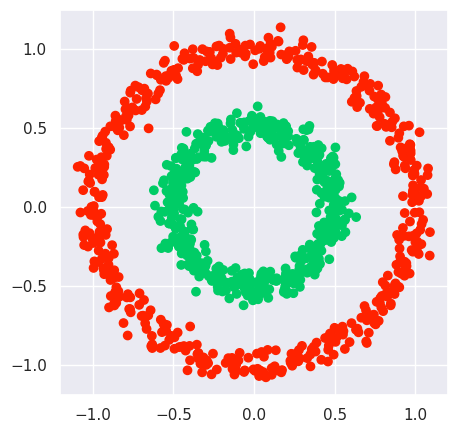

In [5]:
# Генерация данных
n_samples = 1024
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

Обучите реализованную ранее нейросеть решать задачу классификации на основе этой выборки.

*Периодически во время обучения рисуйте график лосса. Если он возрастает, стоит поискать ошибку.*

Эпоха 100/1000, Лосс: 0.6933
Эпоха 200/1000, Лосс: 0.6933
Эпоха 300/1000, Лосс: 0.6932
Эпоха 400/1000, Лосс: 0.6932
Эпоха 500/1000, Лосс: 0.6932
Эпоха 600/1000, Лосс: 0.6932
Эпоха 700/1000, Лосс: 0.6932
Эпоха 800/1000, Лосс: 0.6932
Эпоха 900/1000, Лосс: 0.6932
Эпоха 1000/1000, Лосс: 0.6932


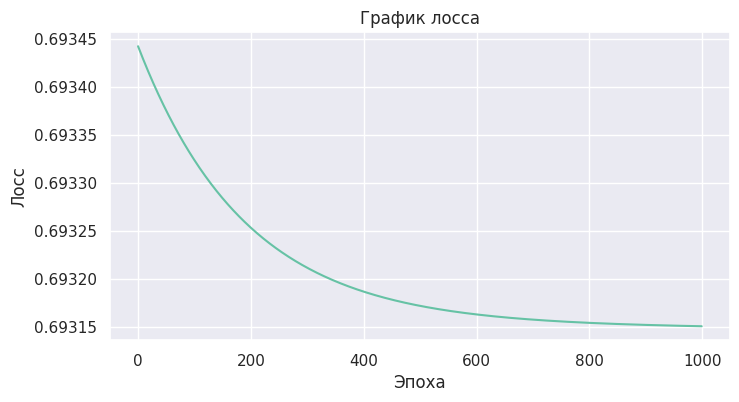

In [12]:
# Обучение модели с выводом графика лосса каждые 100 эпох
model = TwoLayersNNClassifier(input_size=2, hidden_size=10, learning_rate=0.01, n_epoch=1000, weight_init_scale=0.1)
model.fit(X, y, verbose=True, plot_freq=100)

# Итоговый график лосса
plt.figure(figsize=(8, 4))
plt.plot(model.loss_history)
plt.xlabel("Эпоха")
plt.ylabel("Лосс")
plt.title("График лосса")
plt.show()


С помощью функции `np.meshgrid` создайте двухмерную сетку в диапазоне $[-1.5, 1.5]$ по каждой координате с шагом не более $0.02$. Для каждой точки сетки посчитайте оценки вероятностей принадлежности тому или иному классу. 

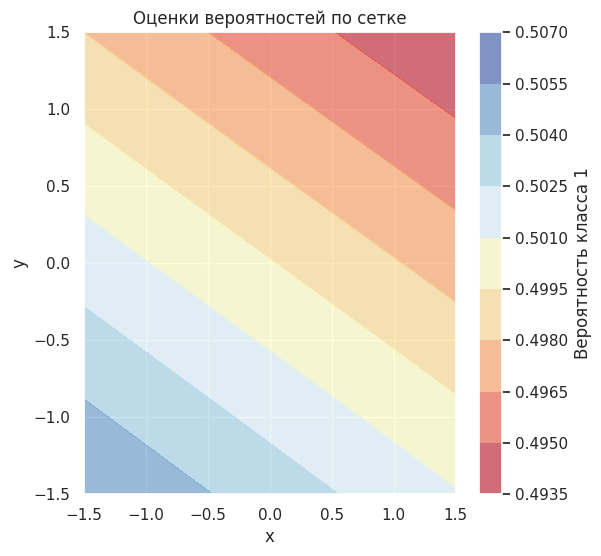

In [10]:
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max + step, step),
                     np.arange(y_min, y_max + step, step))

grid_points = np.c_[xx.ravel(), yy.ravel()]

# Вычисление вероятностей принадлежности к классу 1 для каждой точки
probs = model.predict_proba(grid_points)[:, 1]
probs = probs.reshape(xx.shape)

# Визуализация вероятностей
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, probs, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.colorbar(label="Вероятность класса 1")
plt.title("Оценки вероятностей по сетке")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Визуализируйте полученные предсказания классов и вероятностей.

*Если у вас получилось плохое качество, попробуйте увеличить количество нейронов. Если не помогает, возможно, где-то ошибка.*

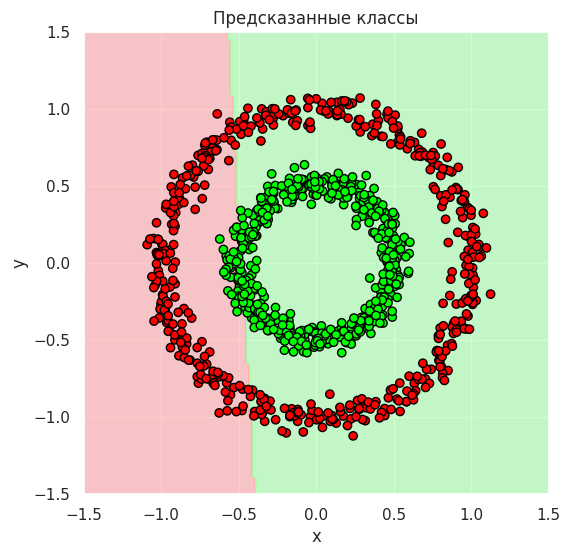

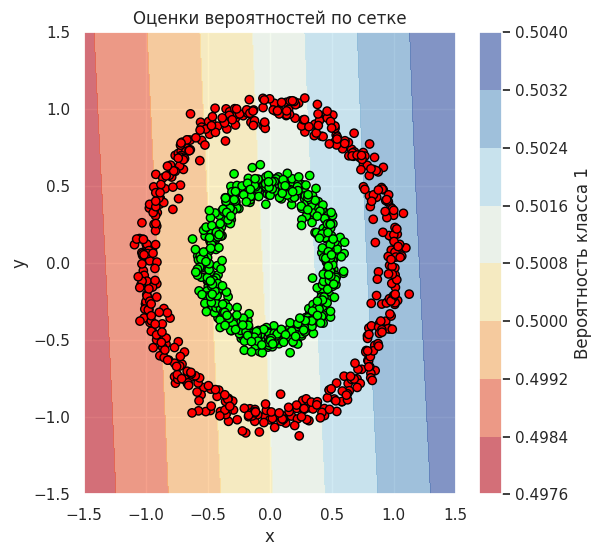

In [14]:
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max + step, step),
                     np.arange(y_min, y_max + step, step))

grid_points = np.c_[xx.ravel(), yy.ravel()]

# Предсказываем классы (0 или 1)
pred_classes = model.predict(grid_points)
pred_classes = pred_classes.reshape(xx.shape)

# Предсказываем вероятности класса 1
probs = model.predict_proba(grid_points)[:, 1]
probs = probs.reshape(xx.shape)

# 1. Визуализация предсказанных классов (граница принятия решения)
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, pred_classes, cmap=ListedColormap(["#FFAAAA", "#AAFFAA"]), alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["#FF0000", "#00FF00"]), edgecolors="k")
plt.title("Предсказанные классы")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 2. Визуализация вероятностей принадлежности к классу 1
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, probs, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.colorbar(label="Вероятность класса 1")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["#FF0000", "#00FF00"]), edgecolors="k")
plt.title("Оценки вероятностей по сетке")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Немного увеличим разброс данных

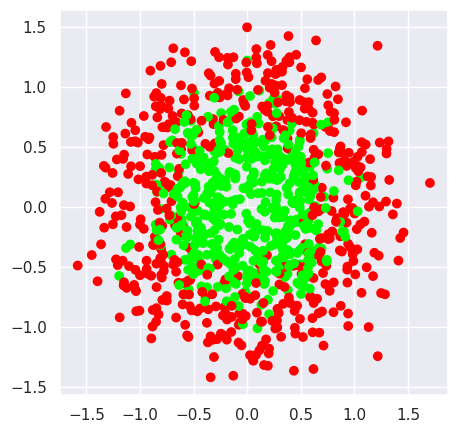

In [15]:
# Генерация данных
n_samples = 1024
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.25)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

Повторите те же действия с новыми данными.

Эпоха 200/1500, Лосс: 0.6934
Эпоха 400/1500, Лосс: 0.6932
Эпоха 600/1500, Лосс: 0.6932
Эпоха 800/1500, Лосс: 0.6932
Эпоха 1000/1500, Лосс: 0.6932
Эпоха 1200/1500, Лосс: 0.6931
Эпоха 1400/1500, Лосс: 0.6931


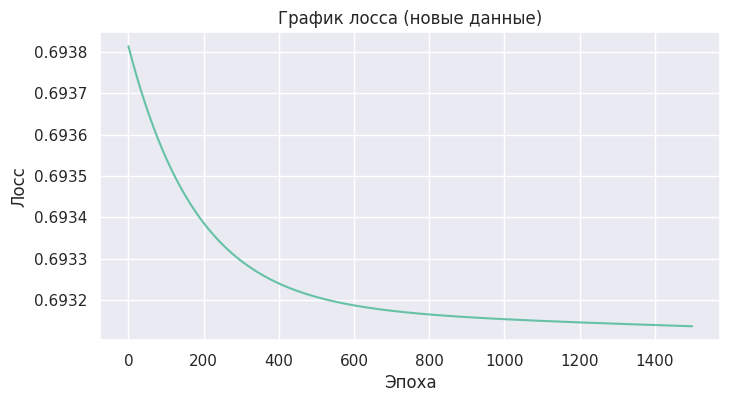

In [16]:
# Создание и обучение модели
model = TwoLayersNNClassifier(
    input_size=2, 
    hidden_size=20,
    learning_rate=0.01, 
    n_epoch=1500,
    weight_init_scale=0.1
)
model.fit(X, y, verbose=True, plot_freq=200)

# Визуализация лосса
plt.figure(figsize=(8, 4))
plt.plot(model.loss_history)
plt.xlabel("Эпоха")
plt.ylabel("Лосс")
plt.title("График лосса (новые данные)")
plt.show()

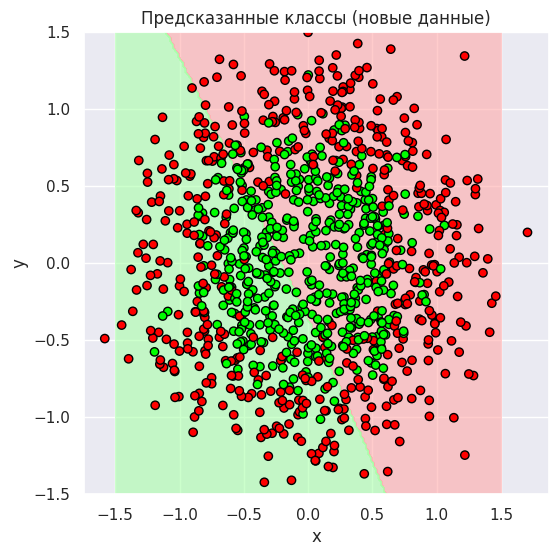

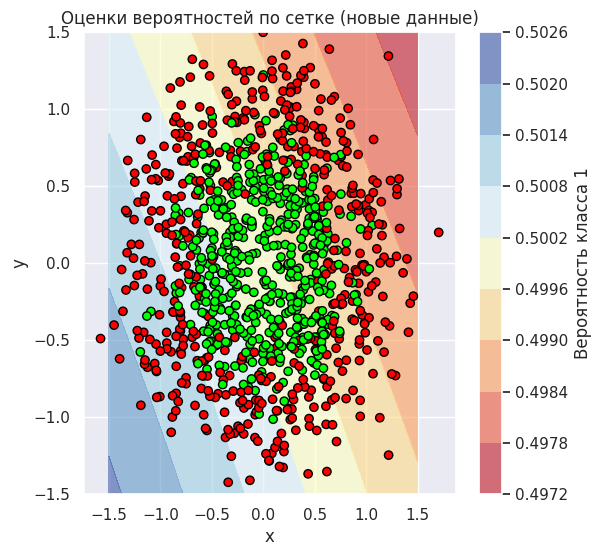

In [17]:
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max + step, step),
                     np.arange(y_min, y_max + step, step))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Предсказанные классы
pred_classes = model.predict(grid_points)
pred_classes = pred_classes.reshape(xx.shape)

# Предсказанные вероятности класса 1
probs = model.predict_proba(grid_points)[:, 1]
probs = probs.reshape(xx.shape)

# Визуализация предсказанных классов
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, pred_classes, cmap=ListedColormap(["#FFAAAA", "#AAFFAA"]), alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors="k")
plt.title("Предсказанные классы (новые данные)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Визуализация вероятностей
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, probs, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.colorbar(label="Вероятность класса 1")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors="k")
plt.title("Оценки вероятностей по сетке (новые данные)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Выводы:**

Сложность данных и слабая обучаемость модели.
При повышенном шуме (noise=0.25) выборка стала значительно сложнее для разделения, и сеть (с указанными гиперпараметрами) практически не снижает функцию потерь, застряв около 0.693. Это указывает на то, что модель не «выучила» чёткую границу между классами и даёт вероятности близкие к 0.5.

Недостаточная мощность или неправильные гиперпараметры.
Чтобы улучшить качество, можно увеличить число нейронов в скрытом слое (hidden_size), число эпох (n_epoch) или попробовать другую скорость обучения (learning_rate). Более «мощная» модель или более длительное обучение могут помочь лучше разделить классы, даже при высоком уровне шума.

**4.** Теперь давайте применим нашу нейронную сеть к данным MNIST.

Загрузите данные. Для этого воспользуйтесь кодом из задачи 1. Обратите внимание, что поскольку наша сеть реализована на `numpy` и принимает `numpy`-матрицы, потребуется предварительно перевести `torch`-тензоры в `numpy`-массивы.

Поскольку наша сеть была разработана для бинарной классификации, мы будем рассматривать изображения, на которых представлены только две цифры: `0` и `1`. Возьмите по 1000 изображений каждого символа и преобразуйте их в векторы. Также выделите изображения из тестовой выборки, соответствующие этим цифрам.

In [20]:
#Загрузка датасета MNIST
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)

In [21]:
# 2. оставляем только изображения цифр '0' и '1'
train_images_0_1 = []
train_labels_0_1 = []

for img, label in train_dataset:
    if label in [0, 1]:
        train_images_0_1.append(img)
        train_labels_0_1.append(label)

test_images_0_1 = []
test_labels_0_1 = []

for img, label in test_dataset:
    if label in [0, 1]:
        test_images_0_1.append(img)
        test_labels_0_1.append(label)

#Возьмём по 1000 примеров каждой цифры (0 и 1) из тренировочной выборки
train_images_0_1 = torch.stack(train_images_0_1)
train_labels_0_1 = torch.tensor(train_labels_0_1)

idx_0 = (train_labels_0_1 == 0).nonzero(as_tuple=True)[0]
idx_1 = (train_labels_0_1 == 1).nonzero(as_tuple=True)[0]

idx_0 = idx_0[:1000]
idx_1 = idx_1[:1000]

# Сформируем объединённый набор
chosen_idx = torch.cat((idx_0, idx_1))
train_images_0_1 = train_images_0_1[chosen_idx]
train_labels_0_1 = train_labels_0_1[chosen_idx]

# Преобразуем изображения в векторы
train_images_0_1 = train_images_0_1.view(train_images_0_1.size(0), -1)

# Переведём в numpy
X_train = train_images_0_1.numpy()
y_train = train_labels_0_1.numpy()

# Аналогично обрабатываем тестовую выборку
test_images_0_1 = torch.stack(test_images_0_1)
test_labels_0_1 = torch.tensor(test_labels_0_1)

# Преобразуем (28x28) в (784,)
X_test = test_images_0_1.view(test_images_0_1.size(0), -1).numpy()
y_test = test_labels_0_1.numpy()

print("Размер обучающей выборки (только 0 и 1):", X_train.shape, y_train.shape)
print("Размер тестовой выборки (только 0 и 1):", X_test.shape, y_test.shape)


Размер обучающей выборки (только 0 и 1): (2000, 784) (2000,)
Размер тестовой выборки (только 0 и 1): (2115, 784) (2115,)


Обучите реализованную ранее нейронную сеть к этим данным.


Эпоха 200/1500, Лосс: 0.1014
Эпоха 400/1500, Лосс: 0.0408
Эпоха 600/1500, Лосс: 0.0258
Эпоха 800/1500, Лосс: 0.0193
Эпоха 1000/1500, Лосс: 0.0157
Эпоха 1200/1500, Лосс: 0.0134
Эпоха 1400/1500, Лосс: 0.0117


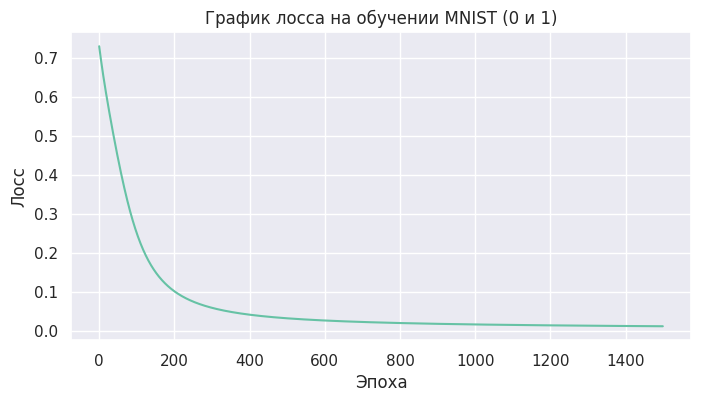

In [24]:
#Создаем экземпляр модели для MNIST
model_mnist = TwoLayersNNClassifier(
    input_size=784,
    hidden_size=50,
    learning_rate=0.01,
    n_epoch=1500,
    weight_init_scale=0.1
)

# Обучаем модель на тренировочных данных
model_mnist.fit(X_train, y_train, verbose=True, plot_freq=200)

# Отрисовка графика лосса
plt.figure(figsize=(8, 4))
plt.plot(model_mnist.loss_history)
plt.xlabel("Эпоха")
plt.ylabel("Лосс")
plt.title("График лосса на обучении MNIST (0 и 1)")
plt.show()


Посчитайте качество обученной нейросети на тестовой выборке. Можете ли вы сказать, насколько хорошо сеть обучилась?

In [27]:
# Оценка точности на тестовой выборке
y_pred = model_mnist.predict(X_test)
test_accuracy = np.mean(y_pred.flatten() == y_test)
print(f"Точность на тестовой выборке: {test_accuracy:.2f}")

Точность на тестовой выборке: 1.00


**Выводы:**

1. За 1500 эпох наблюдается стабильное снижение функции потерь – от примерно 0.1014 на 200-й эпохе до около 0.0117 на 1400-й эпохе. Это свидетельствует о том, что оптимизация проходит успешно и модель сходится.

2. Значительно низкое значение лосса в конце обучения указывает на эффективное разделение классов (цифры 0 и 1). Однако стоит дополнительно проверить модель на независимой тестовой выборке, чтобы убедиться в отсутствии переобучения.

Таким образом, модель обучилась корректно и демонстрирует высокое качество классификации на выбранном наборе данных.

---
### Задача 4.

Рассмотрим глубокую нейронную сеть, которая
* принимает на вход $x\in\mathbb{R}^d$,
* возвращает $y\in\{0, 1\}$,
* содержит $99$ полносвязных слоев (`Linear`) с функцией активации $\tanh$, за исключением последнего слоя,
* последний слой использует функцию активации логистическая сигмоида.

В качестве лосса $\mathscr{L}(\theta)$ возьмем кросс-энтропию.

**1.** Распишите градиент лосса по весам первого слоя $W_1$. Какова сложность этой операции?

Обозначим:
- $a_0 = x$ – входной вектор,
- $z_1 = a_0 W_1 + b_1$ и $a_1 = \tanh(z_1)$ – выходы первого слоя,
- Для $l = 2, \dots, 99$ имеем:  
  $$
  z_l = a_{l-1} W_l + b_l,\quad a_l = \tanh(z_l),
  $$
- Для последнего (100-го) слоя:  
  $$
  z_{100} = a_{99} W_{100} + b_{100},\quad y = \sigma(z_{100}),
  $$
  где $\sigma(z) = \frac{1}{1+e^{-z}}$ – логистическая сигмоида.

При использовании кросс-энтропии в качестве функции потерь, если обозначить $\mathscr{L}(\theta)$ – функция потерь, то, согласно правилу цепочки, градиент по весам первого слоя имеет вид:

$$
\frac{\partial \mathscr{L}}{\partial W_1} = x^\top\, \delta_1,
$$

где $\delta_1 = \frac{\partial \mathscr{L}}{\partial z_1}$ – ошибка, "прокрученная" назад до первого слоя. Ее можно записать через произведение якобианов последующих слоёв:

$$
\delta_1 = \left(\prod_{l=2}^{100} J_l\right) \frac{\partial \mathscr{L}}{\partial z_{100}},
$$

где для $l = 2, \dots, 99$ якобиан слоя имеет вид

$$
J_l = \operatorname{diag}\Bigl(1-\tanh^2(z_{l-1})\Bigr)\, W_l,
$$

а для последнего слоя (с сигмоидой)

$$
J_{100} = \operatorname{diag}\Bigl(\sigma(z_{100})(1-\sigma(z_{100}))\Bigr)\, W_{100}.
$$

Итоговое выражение для градиента первого слоя можно записать так:

$$
\frac{\partial \mathscr{L}}{\partial W_1} = x^\top\, \left(\prod_{l=2}^{100} \operatorname{diag}\Bigl(1-\tanh^2(z_{l-1})\Bigr)\, W_l \right) \operatorname{diag}\Bigl(\sigma(z_{100})(1-\sigma(z_{100}))\Bigr)\, \frac{\partial \mathscr{L}}{\partial y}.
$$

**Сложность операции:**

- Для обратного распространения ошибки нужно последовательно вычислить произведение якобианов для всех слоёв, что требует $O(L)$ операций, где $L = 100$ – число слоёв (точнее, $99$ умножений матриц, если считать, что размерность скрытого слоя фиксирована).
- При этом вычисление $\frac{\partial \mathscr{L}}{\partial W_1}$ требует умножения входного вектора $x$ (размер $d$) на матрицу $\delta_1$ (размер, соответствующий количеству нейронов первого слоя). Если обозначить число нейронов в каждом слое через $h$, то каждое матричное умножение стоит $O(d \cdot h)$ или $O(h^2)$ для внутренних слоёв.
- Таким образом, итоговая сложность вычисления градиента по $W_1$ будет линейна по числу слоёв, то есть $O(100 \cdot h^2)$ (при фиксированном $d$ и $h$).

В результате, обратное распространение ошибки для градиента по весам первого слоя имеет **линейную сложность по числу слоёв**.

Нарисуйте график функции активации и ее производной.

In [28]:
# диапазон значений x
x = np.linspace(-3, 3, 400)

# Вычисляем tanh(x) и её производную: 1 - tanh^2(x)
y_tanh = np.tanh(x)
y_tanh_deriv = 1 - np.tanh(x)**2


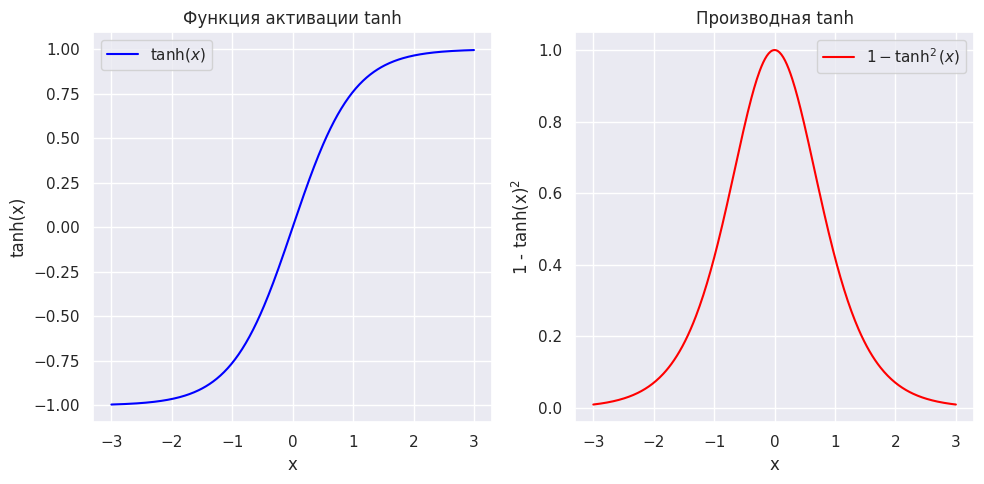

In [ ]:
plt.figure(figsize=(10, 5))

# График функции активации tanh
plt.subplot(1, 2, 1)
plt.plot(x, y_tanh, label=r'$\tanh(x)$', color='blue')
plt.title('Функция активации tanh')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.legend()

# График производной tanhplt.subplot(1, 2, 2)
plt.plot(x, y_tanh_deriv, label=r"$1-\tanh^2(x)$", color='red')
plt.title('Производная tanh')
plt.xlabel('x')
plt.ylabel("1 - tanh(x)$^2$")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

На основе графика проанализируйте, что будет происходить с градиентом по весам первого слоя, если нейросеть "ненулевая", иначе говоря, на промежуточных слоях может выдавать различные значения, в том числе довольно большие.

В глубоких нейронных сетях с активацией tanh производная $1 - \tanh^2(x)$ быстро становится малой при $|x|>1$. Из-за многократного перемножения таких маленьких значений градиенты на ранних слоях экспоненциально затухают.

Если входные значения в скрытых слоях достигают хотя бы двух по модулю, производная может быть около 0.07, и после нескольких десятков слоёв итоговый градиент фактически обнуляется. В результате параметры первых слоёв почти не изменяются, что называют «параличом» сети.

Небольшой запас даёт ситуация, когда $|x|\approx 0$ и производная близка к единице, но это редко сохраняется на всех слоях. Такое поведение приводит к тому, что обучение становится крайне затруднительным или вовсе останавливается.

В литературе это явление известно как исчезающие градиенты (vanishing gradients). Чтобы избежать этой проблемы, используют функции активации ReLU и её вариации, а также приёмы вроде residual-коннектов и batch normalization. Серьёзную роль играет и правильная инициализация весов (например, Xavier), чтобы значения активаций не выходили из «рабочего» диапазона. Без подобных методов глубокая сеть на tanh обычно не обучается или обучается очень медленно.

**2.** Реализуйте эту нейросеть на **PyTorch**.

*Примечание.* Каждый слой должен быть инициализирован отдельно. Нельзя создавать копии уже инициализированного слоя.

In [3]:
# При реализации нейросети запрещено пользоваться ИИ-инструментами.

class DeepNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=100):
        """
        num_layers: общее число слоёв, где первые num_layers-1 слоев с активацией tanh, а последний – с sigmoid.
        """
        super(DeepNet, self).__init__()
        self.fc_layers = nn.ModuleList()
        # Первый слой: преобразует вход из input_size в hidden_size
        self.fc_layers.append(nn.Linear(input_size, hidden_size))
        # Средние слои: hidden_size -> hidden_size (num_layers - 2 штук)
        for _ in range(num_layers - 2):
            self.fc_layers.append(nn.Linear(hidden_size, hidden_size))
        # Последний слой: преобразует hidden_size в 1 (выходная вероятность)
        self.fc_layers.append(nn.Linear(hidden_size, 1))
        
    def forward(self, x):
        # Применяем tanh для всех слоёв, кроме последнего
        for layer in self.fc_layers[:-1]:
            x = torch.tanh(layer(x))
        # Последний слой + сигмоида для получения вероятности
        x = torch.sigmoid(self.fc_layers[-1](x))
        return x

Аналогично задаче 2 попробуйте обучить эту нейросеть для классификации изображений с цифрами 0 и 1 из датасета MNIST. Скорее всего весь датасет не поместится в память, поэтому предлагается использовать случайную подвыборку (батч) размера 22 на каждом шаге обучения.

In [ ]:
# Загрузка данных MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Преобразуем изображение 28x28 в вектор размерности 784
])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [5]:
# Фильтрация: оставляем только изображения цифр 0 и 1
def filter_dataset(dataset):
    indices = [i for i, (_, label) in enumerate(dataset) if label in [0, 1]]
    return Subset(dataset, indices)

train_subset = filter_dataset(train_dataset)
test_subset = filter_dataset(test_dataset)

# Используем DataLoader с размером батча 22
train_loader = DataLoader(train_subset, batch_size=22, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=22, shuffle=False)

In [6]:
# Инициализация модели
input_size = 784
hidden_size = 128  # можно регулировать
model = DeepNet(input_size, hidden_size, num_layers=100)

# Определяем функцию потерь и оптимизатор
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Эпоха 1/10, Лосс: 0.6918
Эпоха 2/10, Лосс: 0.6913
Эпоха 3/10, Лосс: 0.6913
Эпоха 4/10, Лосс: 0.6912
Эпоха 5/10, Лосс: 0.6933
Эпоха 6/10, Лосс: 0.6921
Эпоха 7/10, Лосс: 0.6915
Эпоха 8/10, Лосс: 0.6914
Эпоха 9/10, Лосс: 0.6920
Эпоха 10/10, Лосс: 0.6920


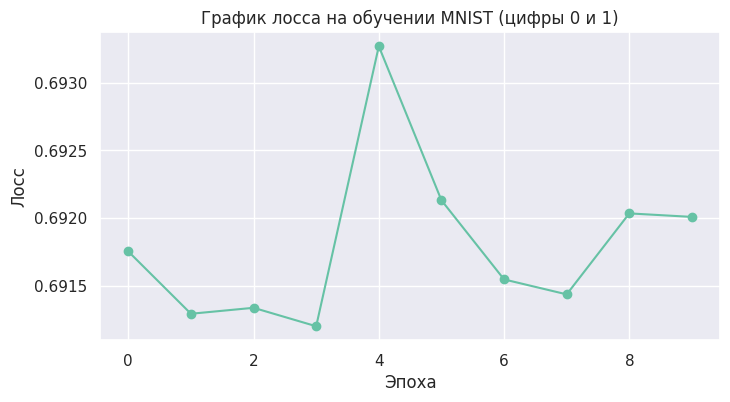

Точность на тестовой выборке: 0.5366


In [ ]:
# Обучение модели
num_epochs = 10
loss_history = []

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    for data, target in train_loader:
        target = target.float().unsqueeze(1)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
    avg_loss = np.mean(epoch_losses)
    loss_history.append(avg_loss)
    print(f"Эпоха {epoch+1}/{num_epochs}, Лосс: {avg_loss:.4f}")

# Отрисовка графика лосса
plt.figure(figsize=(8, 4))
plt.plot(loss_history, marker='o')
plt.xlabel("Эпоха")
plt.ylabel("Лосс")
plt.title("График лосса на обучении MNIST (цифры 0 и 1)")
plt.show()

# Оценка качества на тестовой выборке
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        target = target.float().unsqueeze(1)
        output = model(data)
        preds = (output > 0.5).float()
        correct += (preds == target).sum().item()
        total += target.size(0)
test_accuracy = correct / total
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

Постройте график зависимости среднего и максимального абсолютного значения градиента по весам для каждого слоя от номера слоя.

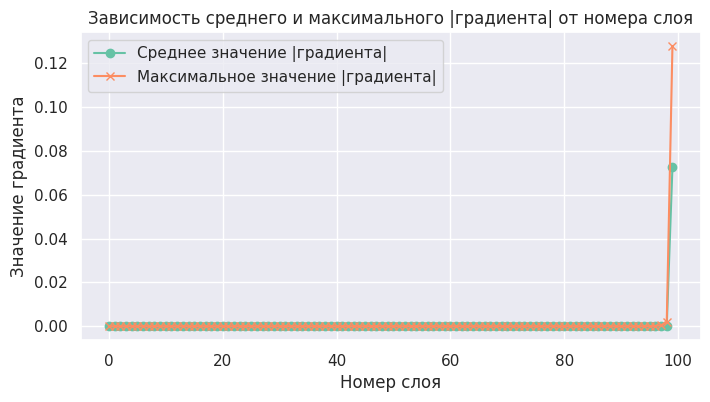

In [15]:
avg_grads = []
max_grads = []

# Перебираем все слои модели
for i, layer in enumerate(model.fc_layers):

    weight_grad = layer.weight.grad
    bias_grad = layer.bias.grad
    
    # Считаем средний и максимальный модуль градиента по весам
    avg_w = weight_grad.abs().mean().item()
    max_w = weight_grad.abs().max().item()

    # Считаем средний и максимальный модуль градиента по смещениям
    avg_b = bias_grad.abs().mean().item()
    max_b = bias_grad.abs().max().item()
    
    # Для наглядности можно усреднить «веса» и «сдвиги» или хранить их по отдельности.
    # усредним:
    avg_layer = 0.5 * (avg_w + avg_b)
    max_layer = max(max_w, max_b)
    
    avg_grads.append(avg_layer)
    max_grads.append(max_layer)

# Построение графика
plt.figure(figsize=(8, 4))
plt.plot(avg_grads, label="Среднее значение |градиента|", marker='o')
plt.plot(max_grads, label="Максимальное значение |градиента|", marker='x')
plt.xlabel("Номер слоя")
plt.ylabel("Значение градиента")
plt.title("Зависимость среднего и максимального |градиента| от номера слоя")
plt.legend()
plt.grid(True)
plt.show()

**Выводы:**

1. На графике видно, что **градиенты на большинстве слоёв практически обнуляются** (среднее и максимальное значения около нуля). Это указывает на **эффект исчезающих градиентов**: чем глубже слой, тем меньше к нему «доходит» градиент от выхода сети.

2. При этом у **последнего слоя** (номер 100) наблюдается резкий всплеск значений градиентов. Это характерная ситуация, когда обратный сигнал доходит только до нескольких последних слоёв, а в первых слоях фактически гасится.

3. Причиной обычно является выбор функции активации $tanh$ и/или слишком глубокая архитектура без механизмов стабилизации (например, без пропускных соединений, нормализации инициализации и т.п.).

4. Итог: сеть **не может эффективно обучиться**, так как **первые слои практически не получают корректного сигнала об ошибке** и их веса почти не обновляются.

*Примечание.* Подобная ситуация известна как "паралич" нейросети. Именно поэтому такие функции активации, как ReLU, стали очень популярными. Для преодоления этого паралича существует множество методов, многие из которых мы рассмотрим на 2 курсе.